7장 신경망

7.4 코드 샘플 및 바닐라 MLP

7.4.1 회귀 예시

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32560\2378900137.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['R1M_Usd_C'] = np.where(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32560\2378900137.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['R12M_Usd_C'] = np.where(


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_raw = pd.read_csv('data_ml.csv')
idx_date = data_raw.index[(
    data_raw['date'] > '1999-12-31') & (
    data_raw['date'] < '2019-01-01')].tolist()
#날짜를 받기 위한 인덱스 생성
data_ml = data_raw.iloc[idx_date]
#날짜 인덱스에 따라 데이터셋 필터링
data_ml.iloc[0:6, 0:6]

features = list(data_ml.iloc[:, 3:95].columns)
# 특성의 열 이름 저장 
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd",
                  "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

df_median = []
df = []

df_median = data_ml[['date', 'R1M_Usd', 'R12M_Usd']].groupby(
    ['date']).median()
df_median.rename(
    columns={"R1M_Usd": "R1M_Usd_median",
             "R12M_Usd": "R12M_Usd_median"}, inplace=True)

df = pd.merge(data_ml, df_median, how='left', on=['date'])

data_ml['R1M_Usd_C'] = np.where(
    df['R1M_Usd'] > df['R1M_Usd_median'], 1.0, 0.0)
data_ml['R12M_Usd_C'] = np.where(
    df['R12M_Usd'] > df['R12M_Usd_median'], 1.0, 0.0)

separation_date = "2014-01-15"
idx_train = data_ml.index[(data_ml['date']<separation_date)].tolist()
idx_test = data_ml.index[(data_ml['date']>=separation_date)].tolist()
training_sample = data_ml[data_ml.index.isin(idx_train)]
testing_sample = data_ml[data_ml.index.isin(idx_test)]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32560\1726175837.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['R1M_Usd_C'] = np.where(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_32560\1726175837.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['R12M_Usd_C'] = np.where(


In [24]:
import numpy as np
print(np.__version__)

1.26.4


In [25]:
import tensorflow as tf
from plot_keras_history import show_history, plot_history
NN_train_features = training_sample[features].values
NN_train_labels = training_sample['R1M_Usd'].values
NN_test_features = testing_sample[features].values
NN_test_labels = testing_sample['R1M_Usd'].values

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(len(features),)))
model.add(layers.Dense(8,activation="tanh"))
model.add(layers.Dense(1))

c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='RMSprop',
              loss='mse',
              metrics=['MeanAbsoluteError'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │         1,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - MeanAbsoluteError: 0.1220 - loss: 0.0526 - val_MeanAbsoluteError: 0.0667 - val_loss: 0.0370
Epoch 2/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - MeanAbsoluteError: 0.0839 - loss: 0.0245 - val_MeanAbsoluteError: 0.0670 - val_loss: 0.0371
Epoch 3/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - MeanAbsoluteError: 0.0845 - loss: 0.0533 - val_MeanAbsoluteError: 0.0676 - val_loss: 0.0372
Epoch 4/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - MeanAbsoluteError: 0.0836 - loss: 0.0247 - val_MeanAbsoluteError: 0.0671 - val_loss: 0.0371
Epoch 5/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - MeanAbsoluteError: 0.0834 - loss: 0.0227 - val_MeanAbsoluteError: 0.0670 - val_loss: 0.0370
Epoch 6/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - MeanAbsoluteError: 0.0836 - loss: 0.0258 - val_MeanAbsoluteError: 0.0669 - val_loss: 0.0370
Epoch 7/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - MeanAbsoluteError: 0.0833 - loss: 0.0227 - val_MeanAbsoluteError: 0

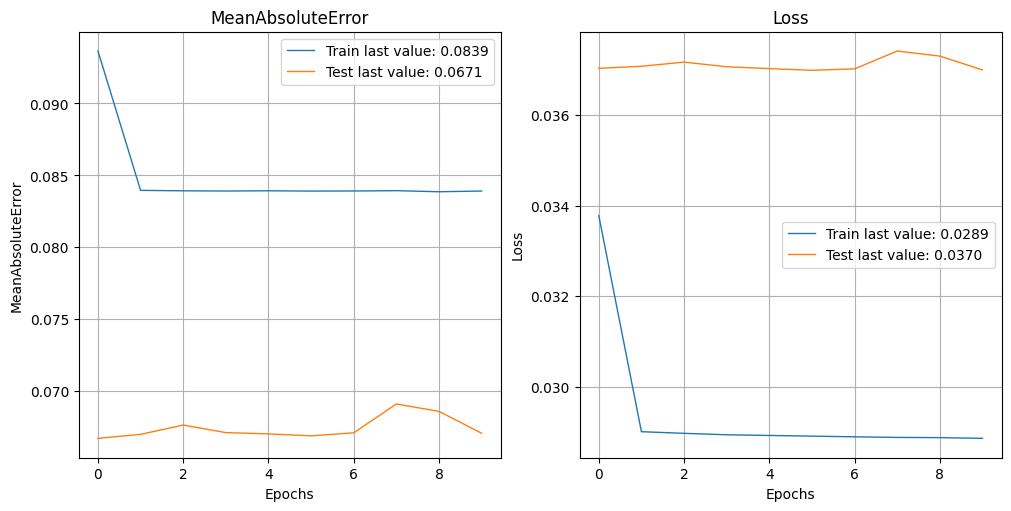

In [28]:
fit_NN = model.fit(
    NN_train_features,
    NN_train_labels,
    batch_size=256,
    epochs=10,
    validation_data=(NN_test_features,NN_test_labels),
    verbose=True
)
show_history(fit_NN)

In [29]:
#hitratio = np.mean(model.predict(NN_test_features)*NN_test_labels>0)
#print(f'Hitratio: {hitratio}')

7.4.2 분류 예시

In [32]:
from tensorflow.keras.utils import to_categorical
NN_train_labels_C = to_categorical(training_sample['R1M_Usd_C'].values)
NN_test_labels_C = to_categorical(testing_sample['R1M_Usd_C'].values)

네트워크 구조

In [34]:
from tensorflow.keras import initializers
from tensorflow.keras.constraints import non_neg
# 케라스 레이어 사용
initializer = initializers.RandomNormal()
model_C = keras.Sequential()
# 네트워크 구조 정의 (레이더 조직)
model_C.add(layers.Dense(16, activation="tanh", #유닛 개수, 활성화 함수
                         input_shape=(len(features),), #입력 변수 크기
                         kernel_initializer=initializer, #가중치 초기화
                         kernel_constraint=non_neg)) #가중치 음수 안됨
model_C.add(layers.Dropout(.25)) #전체 유닛의 25% 드롭아웃
model_C.add(layers.Dense(8, activation="relu",
                         bias_initializer=initializers.Constant(0.2), # 편향 초기화
                         kernel_regularizer='l2')) #가중치 패널티

model_C.add(layers.Dense(2, activation='softmax'))

c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


훈련 사양

In [35]:
model_C.compile(
    optimizer=keras.optimizers.Adam(
        learning_rate=0.01,
        beta_1=0.9,
        beta_2=0.95),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=['categorical_accuracy'])
model_C.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │         1,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,642 (6.41 KB)

 Trainable params: 1,642 (6.41 KB)

 Non-trainable params: 0 (0.00 B)

모델 학습

Epoch 1/20


c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\keras\src\backend\tensorflow\nn.py:707: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.5020 - loss: 0.7181 - val_categorical_accuracy: 0.5037 - val_loss: 0.6933
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - categorical_accuracy: 0.5010 - loss: 0.6932 - val_categorical_accuracy: 0.5037 - val_loss: 0.6931
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - categorical_accuracy: 0.5012 - loss: 0.6932 - val_categorical_accuracy: 0.4963 - val_loss: 0.6931
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - categorical_accuracy: 0.5007 - loss: 0.6932 - val_categorical_accuracy: 0.5037 - val_loss: 0.6931
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - categorical_accuracy: 0.5053 - loss: 0.6931 - val_categorical_accuracy: 0.4963 - val_loss: 0.6932


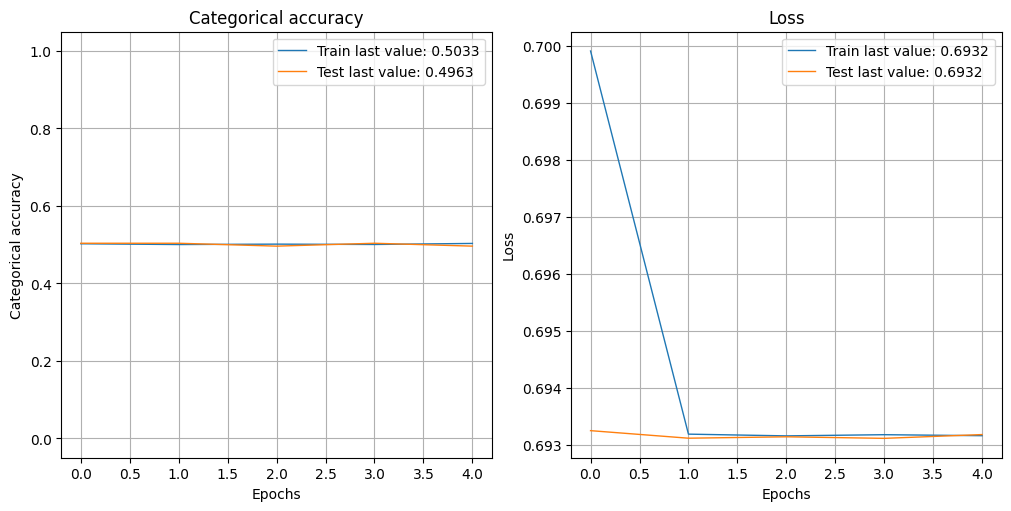

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                            min_delta = 0.001,
                                            patience = 4,
                                            verbose = 0)
fit_NN_C = model_C.fit(
    NN_train_features,
    NN_train_labels_C,
    batch_size=512,
    epochs=20,
    validation_data=(NN_test_features,NN_test_labels_C),
    verbose=True,
    callbacks=[callback]
    )
show_history(fit_NN_C)

7.4.3 커스텀 손실

In [40]:
model_custom = keras.Sequential()
model_custom.add(layers.Dense(16,activation="relu",
                              input_shape=(len(features),)))
model_custom.add(layers.Dense(8,activation="sigmoid"))
model_custom.add(layers.Dense(1))

c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
def custom_loss(y_true, y_pred):
    loss = tf.reduce_mean(
        tf.square(y_pred - tf.reduce_mean(y_pred))) -5 * tf.reduce_mean(
        (y_true - tf.reduce_mean(y_true)) * (y_pred - tf.reduce_mean(y_pred)))
    return loss
model_custom.compile(
    optimizer='RMSprop',
    loss=custom_loss,
    metrics=['MeanAbsoluteError']
)

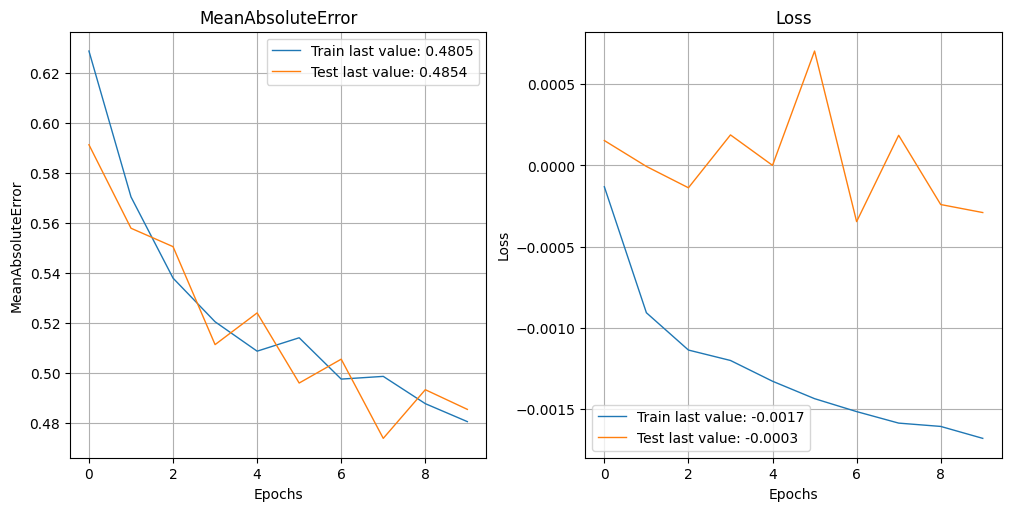

In [42]:
fit_NN_cust = model_custom.fit(
    NN_train_features,
    NN_train_labels,
    batch_size=512,
    epochs=10,
    validation_data=(NN_test_features, NN_test_labels),
    verbose=False
)
show_history(fit_NN_cust)

In [ ]:
hitratio = np.mean(model_custom.predict(NN_test_features) * NN_test_labels>0)
print(f'Hit Ratio: {hitratio}')